In [ ]:
Build a Multiclass classifier using the CNN model. Use MNIST or any other suitable dataset. a. 
Perform Data Pre-processing b. Define Model and perform training c. Evaluate Results using confusion 
matrix.

In [27]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from sklearn.metrics import confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
#load dataset
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [29]:
#normalize
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

In [30]:
#reshape
X_train = np.expand_dims(X_train,axis=-1)
X_test = np.expand_dims(X_test,axis=-1)

In [31]:
#one hot encode
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [32]:
#define cnn model
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    Flatten(),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax')
])

C:\Users\Niyati Patil\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
#compile model
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [34]:
#train model
model.fit(X_train,y_train,epochs=5,batch_size=64,validation_data=(X_test,y_test))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 53s 52ms/step - accuracy: 0.7738 - loss: 0.1254 - val_accuracy: 0.9834 - val_loss: 0.0124
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 49s 53ms/step - accuracy: 0.9829 - loss: 0.0122 - val_accuracy: 0.9859 - val_loss: 0.0102
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 52s 55ms/step - accuracy: 0.9887 - loss: 0.0081 - val_accuracy: 0.9895 - val_loss: 0.0075
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 45s 48ms/step - accuracy: 0.9916 - loss: 0.0063 - val_accuracy: 0.9910 - val_loss: 0.0061
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - accuracy: 0.9935 - loss: 0.0047 - val_accuracy: 0.9916 - val_loss: 0.0061


In [35]:
#get prediction
y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred,axis=1)
y_true = np.argmax(y_test,axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


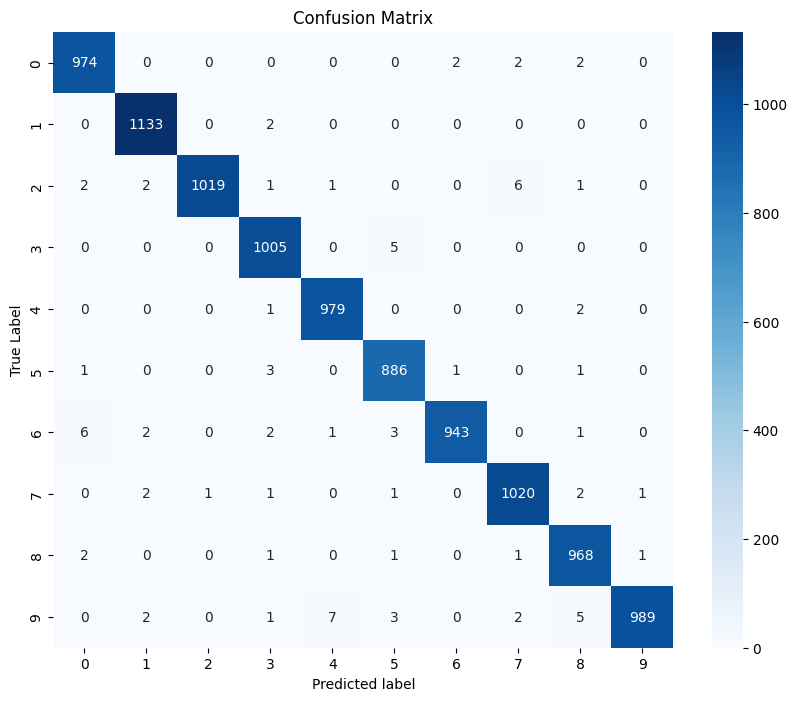

In [38]:
#generate confusion matrix
conf = confusion_matrix(y_true,y_pred_class)
plt.figure(figsize=(10,8))
sns.heatmap(conf,annot=True,fmt="d",cmap="Blues",xticklabels=np.arange(10),yticklabels=np.arange(10))
plt.xlabel("Predicted label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()